In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense,Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.model_selection import train_test_split
from Augmentation import dataset

data_dir='./dataset/'

In [2]:
# Training the deep learning model

input_img = Input(shape=(600,600,3))

x = Conv2D(16, 3, 1, activation='relu', padding='same')(input_img) #nb_filter, nb_row, nb_col
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, 3, 1, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, 3, 1, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, 3, 1, activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, 3, 1, activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, 3, 1, activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, 5, 1, activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='RMSprop', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 600, 600, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 600, 600, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 300, 300, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 8)       1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 8)       584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 8)         0     

In [3]:
# Reading the files
# Image data generators setup
train_datagen = image.ImageDataGenerator()
im_train,im_test,m_train,m_test = dataset()
train_gen = train_datagen.flow(im_train,m_train,batch_size=32)

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [4]:
history = autoencoder.fit(train_gen,epochs=20,validation_data=(im_test,m_test))

Train for 29 steps, validate on 100 samples
Epoch 1/20
29/29 [==============================] - 147s 5s/step - loss: 0.2117 - val_loss: 0.1455
Epoch 2/20
29/29 [==============================] - 123s 4s/step - loss: 0.1381 - val_loss: 0.1556
Epoch 3/20
29/29 [==============================] - 96s 3s/step - loss: 0.1267 - val_loss: 0.1224
Epoch 4/20
29/29 [==============================] - 89s 3s/step - loss: 0.1200 - val_loss: 0.1171
Epoch 5/20
29/29 [==============================] - 92s 3s/step - loss: 0.1144 - val_loss: 0.1170
Epoch 6/20
29/29 [==============================] - 96s 3s/step - loss: 0.1141 - val_loss: 0.1110
Epoch 7/20
29/29 [==============================] - 101s 3s/step - loss: 0.1082 - val_loss: 0.1125
Epoch 8/20
29/29 [==============================] - 89s 3s/step - loss: 0.1062 - val_loss: 0.1112
Epoch 9/20
29/29 [==============================] - 89s 3s/step - loss: 0.1064 - val_loss: 0.1060
Epoch 10/20
29/29 [==============================] - 81s 3s/step - loss

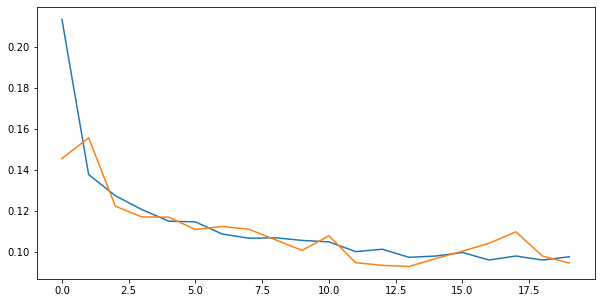

In [5]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [6]:
autoencoder.save('model.h5')

In [7]:
test_gen = train_datagen.flow(im_test[:2])
encoded_img = autoencoder.predict(test_gen)